In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

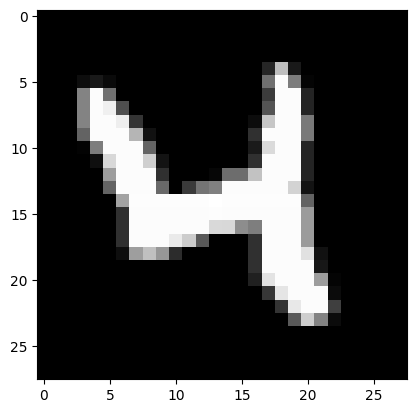

In [4]:
# Visualize a sample
plt.imshow(x_train[20], cmap='gray')
plt.show()

In [5]:
# Reshape the data for ANN
x_train = x_train.reshape(x_train.shape[0], 28 * 28)  # Flatten the images
x_test = x_test.reshape(x_test.shape[0], 28 * 28)  # Flatten the images
input_shape = (28 * 28,)

In [6]:
# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# Print data shapes
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [9]:
# Model parameters
batch_size = 128
epochs = 25

In [11]:
# Build ANN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [13]:
# Train the model
hist = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8577 - loss: 0.4771 - val_accuracy: 0.9656 - val_loss: 0.1131
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9652 - loss: 0.1101 - val_accuracy: 0.9760 - val_loss: 0.0765
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9779 - loss: 0.0713 - val_accuracy: 0.9791 - val_loss: 0.0666
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9801 - loss: 0.0593 - val_accuracy: 0.9808 - val_loss: 0.0654
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.9812 - val_loss: 0.0616
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9799 - val_loss: 0.0679
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0345 - val_accuracy: 0.9802 - val_loss: 0.0679
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9903 - loss: 0.0284 - val_accuracy: 0.

In [14]:
# Save the model
model.save('mnist_ann.h5')
print("Model saved as mnist_ann.h5")

Model saved as mnist_ann.h5


In [15]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09317038208246231
Test accuracy: 0.9818999767303467


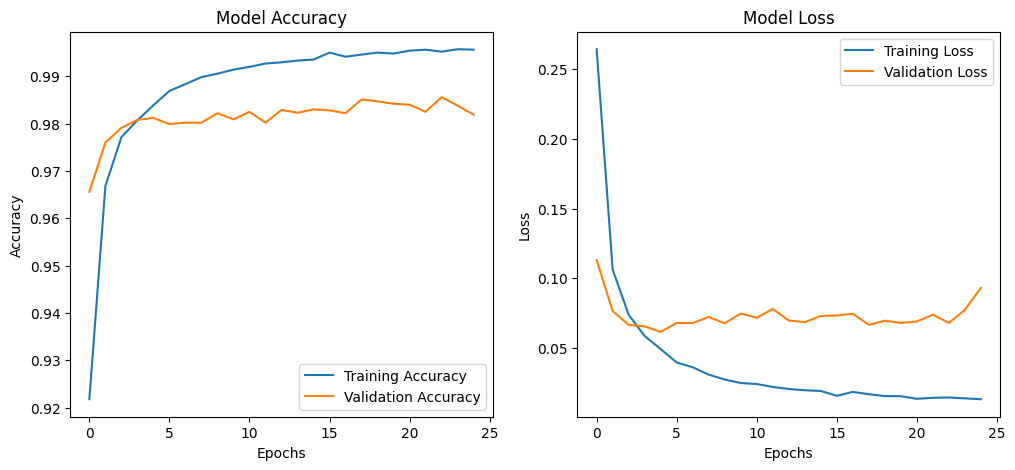

In [19]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#plt.tight_layout()
plt.show()

GUI - draw by hand


In [20]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

In [21]:
model = load_model('mnist_ann.h5')

In [25]:
def predict_digit(img):
    # Resize image to 28x28 pixels
    img = img.resize((28, 28))
    # Convert RGB to grayscale
    img = img.convert('L')
    img = np.array(img)
    # Reshape to (1, 784) to match ANN input and normalize
    img = img.reshape(1, 28 * 28)
    img = img.astype('float32') / 255.0
    # Predict the class
    res = model.predict(img)[0]
    return np.argmax(res), max(res)

In [27]:
class App(tk.Tk):

    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

In [29]:
app = App()

mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


GUI - upload image and predict


In [30]:
from keras.models import load_model
from tkinter import *
from tkinter import filedialog
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np

In [31]:
# Load the pre-trained model
model = load_model('mnist_ann.h5')

def predict_digit(img):
    # Resize image to 28x28 pixels
    img = img.resize((28, 28))
    # Convert RGB to grayscale
    img = img.convert('L')
    img = np.array(img)
    # Reshape to (1, 784) to match ANN input and normalize
    img = img.reshape(1, 28 * 28)
    img = img.astype('float32') / 255.0
    # Predict the class
    res = model.predict(img)[0]
    return np.argmax(res), max(res)

class App(tk.Tk):

    def __init__(self):
        tk.Tk.__init__(self)
        self.title("Handwritten Digit Recognition")
        self.geometry("500x400")
        self.uploaded_image = None

        # Create UI elements
        self.canvas = tk.Canvas(self, width=200, height=200, bg="white", cursor="arrow")
        self.label = tk.Label(self, text="Upload an image", font=("Helvetica", 14))
        self.upload_btn = tk.Button(self, text="Upload Image", command=self.upload_image)
        self.classify_btn = tk.Button(self, text="Recognize", command=self.classify_handwriting)
        self.result_label = tk.Label(self, text="", font=("Helvetica", 20))
        self.clear_btn = tk.Button(self, text="Clear", command=self.clear_canvas)

        # Arrange UI elements
        self.label.pack(pady=10)
        self.canvas.pack(pady=10)
        self.upload_btn.pack(pady=5)
        self.classify_btn.pack(pady=5)
        self.result_label.pack(pady=10)
        self.clear_btn.pack(pady=5)

    def upload_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png *.jpg *.jpeg")])
        if file_path:
            # Open and display the uploaded image
            self.uploaded_image = Image.open(file_path)
            img_resized = self.uploaded_image.resize((200, 200))
            self.tk_image = ImageTk.PhotoImage(img_resized)
            self.canvas.create_image(0, 0, anchor=NW, image=self.tk_image)
            self.label.config(text="Image Uploaded Successfully")

    def classify_handwriting(self):
        if self.uploaded_image:
            digit, acc = predict_digit(self.uploaded_image)
            self.result_label.config(text=f"Predicted: {digit}, Confidence: {int(acc * 100)}%")
        else:
            self.result_label.config(text="Please upload an image first.")

    def clear_canvas(self):
        self.canvas.delete("all")
        self.label.config(text="Upload an image")
        self.result_label.config(text="")
        self.uploaded_image = None

In [34]:
# Run the application
app = App()
mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
